# Pregunta 1

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error


# Load the dataset
flights = pd.read_csv('dataset_SCL.csv')
flights["Fecha-I"] = pd.to_datetime(flights["Fecha-I"])
flights["Fecha-O"] = pd.to_datetime(flights["Fecha-O"])

# Check the data types of the columns
print(flights.dtypes)

# Get summary statistics of the numerical variables
print(flights.describe())

Fecha-I      datetime64[ns]
Vlo-I                object
Ori-I                object
Des-I                object
Emp-I                object
Fecha-O      datetime64[ns]
Vlo-O                object
Ori-O                object
Des-O                object
Emp-O                object
DIA                   int64
MES                   int64
AÑO                   int64
DIANOM               object
TIPOVUELO            object
OPERA                object
SIGLAORI             object
SIGLADES             object
dtype: object
                             Fecha-I                        Fecha-O   
count                          68206                          68206  \
mean   2017-07-05 12:11:25.320059648  2017-07-05 12:20:31.971380992   
min              2017-01-01 00:15:00            2017-01-01 00:04:00   
25%              2017-03-31 12:41:15            2017-03-31 12:51:15   
50%              2017-07-10 05:30:00            2017-07-10 05:37:00   
75%              2017-10-08 11:18:45            2017-10-

/tmp/ipykernel_21006/3477621114.py:11: DtypeWarning: Columns (1,6) have mixed types. Specify dtype option on import or set low_memory=False.
  flights = pd.read_csv('dataset_SCL.csv')


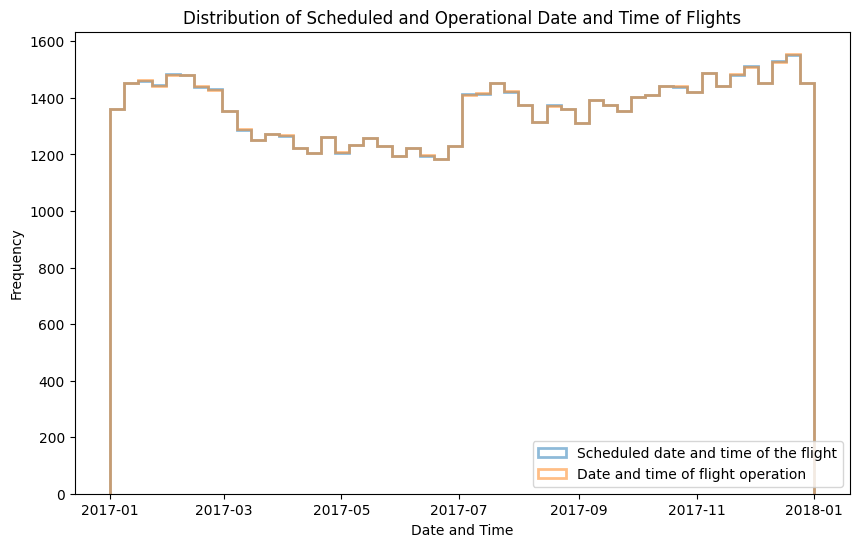

In [4]:
# Plot histograms for "Fecha-I" and "Fecha-O"
plt.figure(figsize=(10, 6))
plt.hist(flights["Fecha-I"], bins=50, alpha=0.5, label="Scheduled date and time of the flight",histtype='step', linewidth=2)
plt.hist(flights["Fecha-O"], bins=50, alpha=0.5, label="Date and time of flight operation",histtype='step', linewidth=2)
plt.legend(loc="lower right")
plt.title("Distribution of Scheduled and Operational Date and Time of Flights")
plt.xlabel("Date and Time")
plt.ylabel("Frequency")
plt.show()


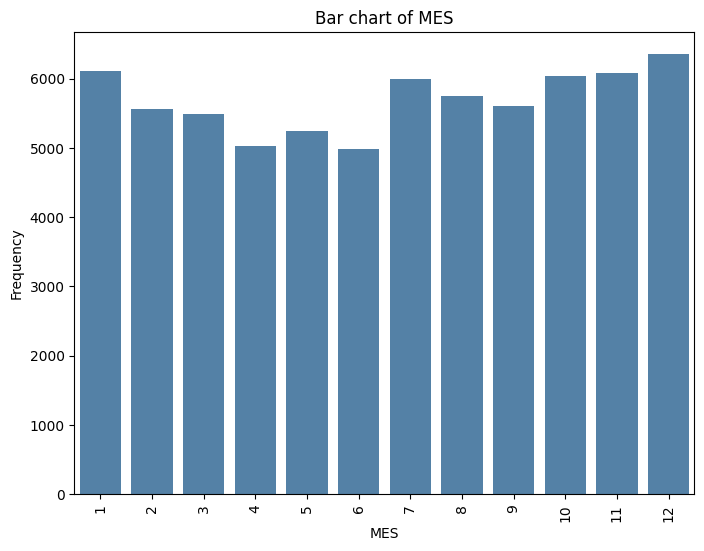

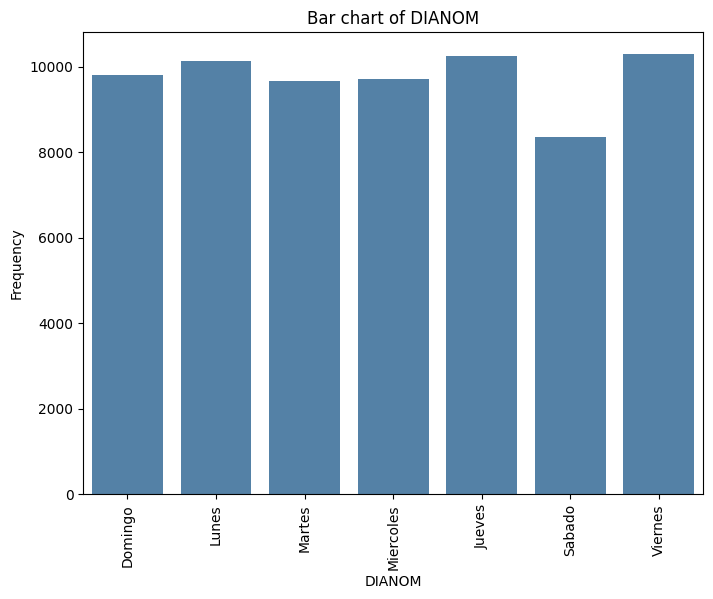

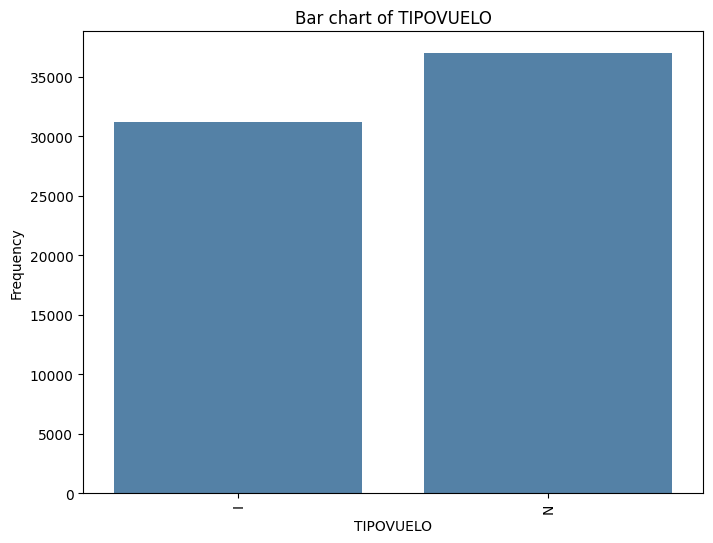

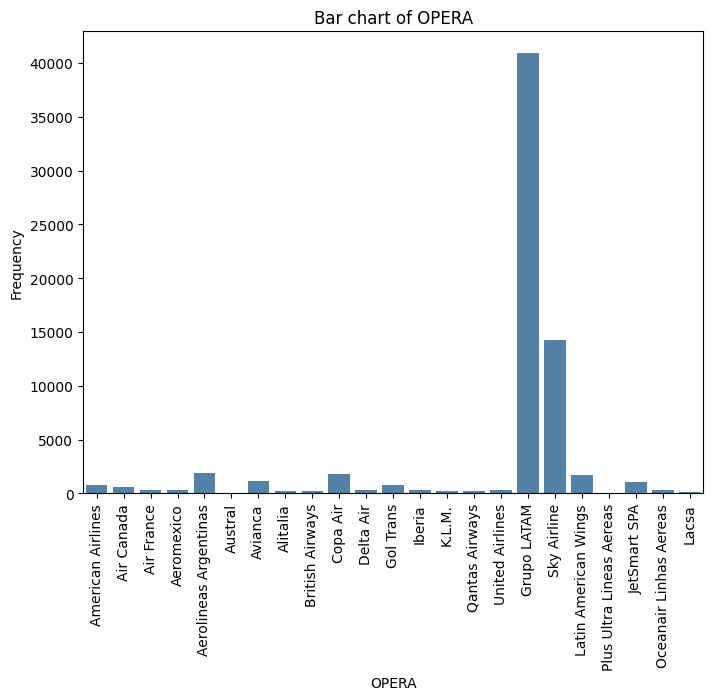

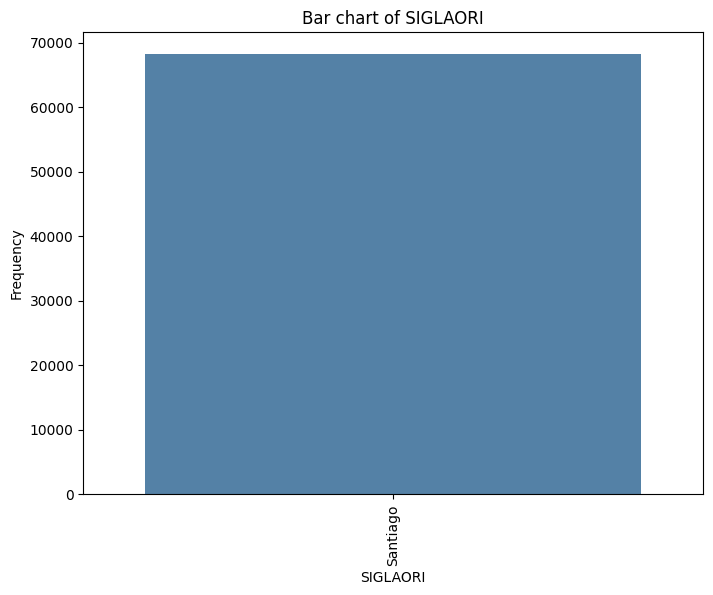

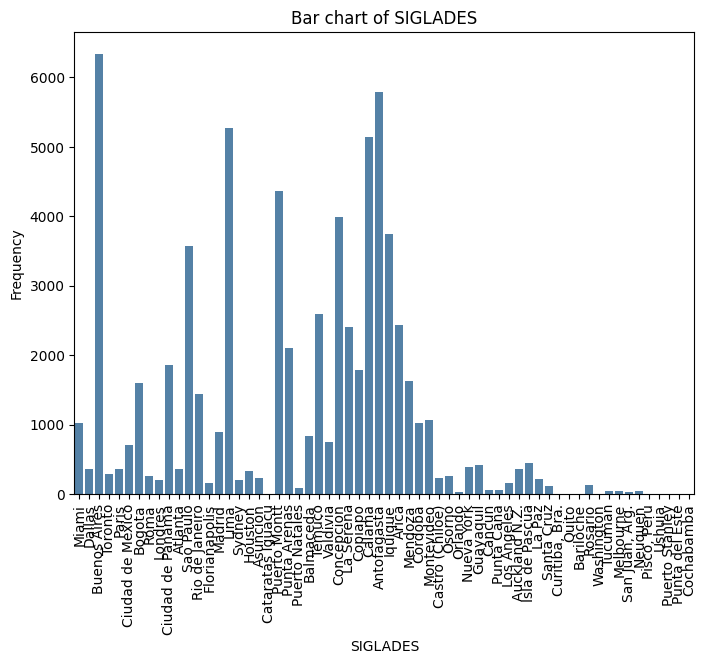

In [5]:
# Plot bar charts of the categorical variables
cat_cols = ['MES','DIANOM','TIPOVUELO', 'OPERA', 'SIGLAORI', 'SIGLADES']
for col in cat_cols:
    plt.figure(figsize=(8,6))
    sns.countplot(x=col, data=flights, color='steelblue')
    plt.title(f'Bar chart of {col}')
    plt.xlabel(col)
    plt.xticks(rotation=90)
    plt.ylabel('Frequency')
    plt.show()

Con los gráficos generados podemos analizar los datos para las distintas variables:
- Los datos están distribuidos de manera relativamente uniforme en lo que respecta a la fecha de operación, con una mayor frecuencia en los meses de fin y principio de años que en los meses de invierno del hemisferio sur (mediados de año)
- Todos los vuelon operan desde el Aeropuerto de SAntiago, con la aerolínea que mas vuelos opera siendo por lejoss del grupo LAtam, seguido de Sky Airlines.
- Existen levemente más frecuencia de vuelos internacionales que nacionales.
- 

# Pregunta 2

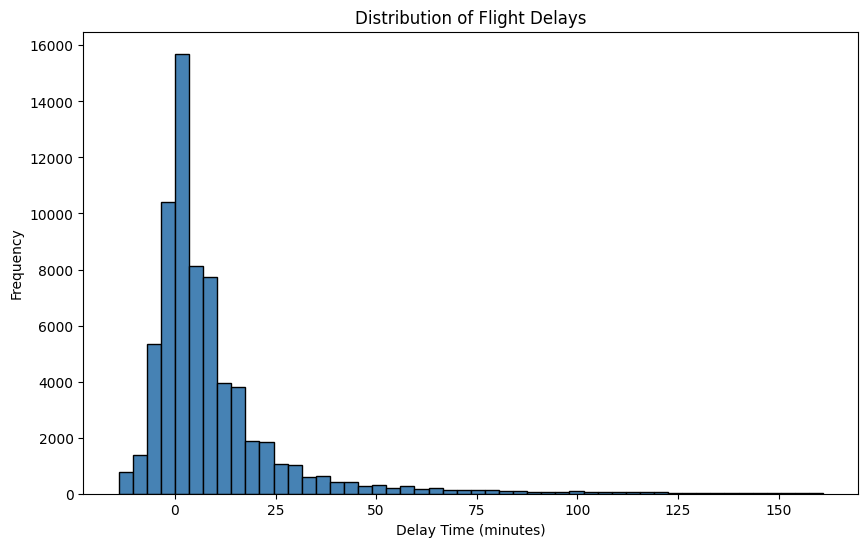

In [4]:
# Calculate the delay time in minutes as the difference between "Fecha-O" and "Fecha-I"
flights["Delay"] = (flights["Fecha-O"] - flights["Fecha-I"]).dt.total_seconds() / 60

# Plot a histogram for the delay time
plt.figure(figsize=(10, 6))
plt.hist(flights["Delay"], bins=50, color="steelblue", edgecolor="black")
plt.title("Distribution of Flight Delays")
plt.xlabel("Delay Time (minutes)")
plt.ylabel("Frequency")
plt.show()

In [5]:
# Create "high_season" column
flights["high_season"] = ((flights["Fecha-I"].dt.month == 12) & (flights["Fecha-I"].dt.day >= 15)) | \
                         ((flights["Fecha-I"].dt.month == 1) | (flights["Fecha-I"].dt.month == 2) | \
                          (flights["Fecha-I"].dt.month == 3) | ((flights["Fecha-I"].dt.month == 7) & \
                          (flights["Fecha-I"].dt.day >= 15)) | (flights["Fecha-I"].dt.month == 8) | \
                          (flights["Fecha-I"].dt.month == 9) & (flights["Fecha-I"].dt.day >= 11))
flights["high_season"] = flights["high_season"].astype(int)

# Create "delay_15" column
flights["delay_15"] = (flights["Delay"] > 15).astype(int)

# Create "period_day" column
flights["period_day"] = pd.cut(flights["Fecha-I"].dt.hour, bins=[0, 5, 12, 19, 24], right=False,
                               labels=["night", "morning", "afternoon", "night"],include_lowest=True, 
                               ordered=False)
    
# Export the new dataset with synthetic features to a CSV file
flights.to_csv("synthetic_features.csv", index=False)



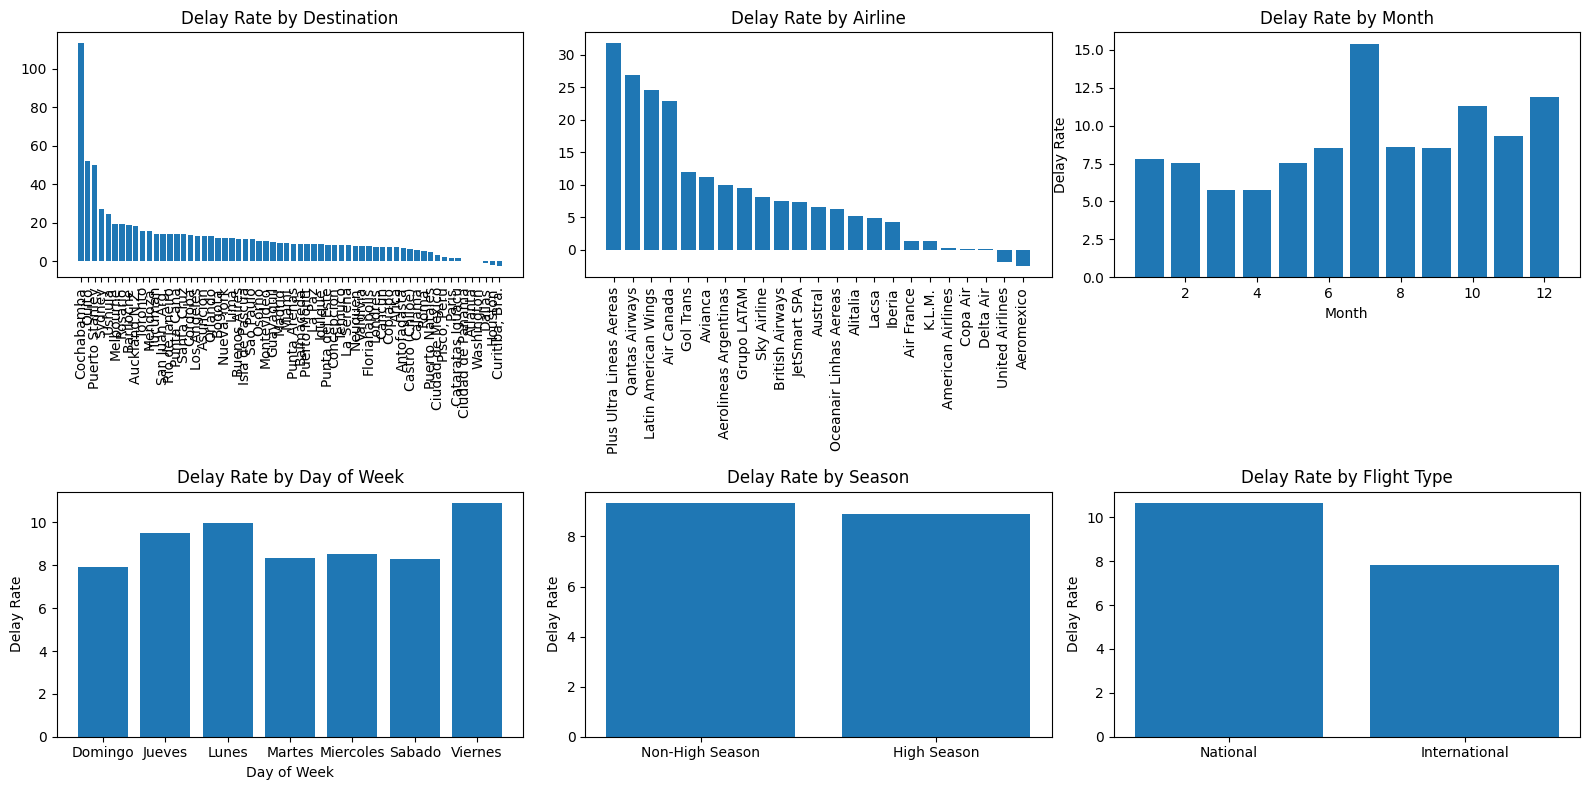

In [6]:
# Calculate delay rate across different categories
delay_by_dest = flights.groupby('SIGLADES')['Delay'].mean().sort_values(ascending=False)
delay_by_airline = flights.groupby('OPERA')['Delay'].mean().sort_values(ascending=False)
delay_by_month = flights.groupby('MES')['Delay'].mean().sort_index()
delay_by_day = flights.groupby('DIANOM')['Delay'].mean().sort_index()
delay_by_season = flights.groupby('high_season')['Delay'].mean()
delay_by_flight_type = flights.groupby('TIPOVUELO')['Delay'].mean()

# Plot the delay rate across different categories
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(16, 8))

axs[0,0].bar(delay_by_dest.index, delay_by_dest.values)
axs[0,0].set_title('Delay Rate by Destination')
axs[0,0].tick_params(axis='x', rotation=90)

axs[0,1].bar(delay_by_airline.index, delay_by_airline.values)
axs[0,1].set_title('Delay Rate by Airline')
axs[0,1].tick_params(axis='x', rotation=90)

axs[0,2].bar(delay_by_month.index, delay_by_month.values)
axs[0,2].set_title('Delay Rate by Month')
axs[0,2].set_xlabel('Month')
axs[0,2].set_ylabel('Delay Rate')

axs[1,0].bar(delay_by_day.index, delay_by_day.values)
axs[1,0].set_title('Delay Rate by Day of Week')
axs[1,0].set_xlabel('Day of Week')
axs[1,0].set_ylabel('Delay Rate')

axs[1,1].bar(delay_by_season.index, delay_by_season.values)
axs[1,1].set_title('Delay Rate by Season')
axs[1,1].set_xticks([0, 1])
axs[1,1].set_xticklabels(['Non-High Season', 'High Season'])
axs[1,1].set_ylabel('Delay Rate')

axs[1,2].bar(delay_by_flight_type.index, delay_by_flight_type.values)
axs[1,2].set_title('Delay Rate by Flight Type')
axs[1,2].set_xticks([0, 1])
axs[1,2].set_xticklabels(['National', 'International'])
axs[1,2].set_ylabel('Delay Rate')

plt.tight_layout()
plt.show()


In [7]:
# select the input features and the target variable
X = flights[["DIA", "MES", "AÑO", "DIANOM", "TIPOVUELO", "OPERA", "SIGLAORI", "SIGLADES", "high_season", "period_day"]]
y = flights["Delay"]

# split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# create a Random Forest regression object
rf = RandomForestRegressor(n_estimators=100, random_state=42)

# fit the model using the training data
rf.fit(X_train, y_train)

# make predictions on the test data
y_pred = rf.predict(X_test)

# evaluate the performance using mean squared error
mse = mean_squared_error(y_test, y_pred)
print("Mean Squared Error:", mse)

ValueError: could not convert string to float: 'Viernes'

In [ ]:
plt.scatter(y_test, y_pred)
plt.xlabel("Actual Delay (minutes)")
plt.ylabel("Predicted Delay (minutes)")
plt.title("Actual vs. Predicted Delay")
plt.show()